In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
path = 'netflix - Sheet1.csv'
data = pd.read_csv(path)
df = pd.DataFrame(data)
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,15-12-2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,01-03-2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,25-02-2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,24-11-2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,22-12-2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9836 entries, 0 to 9835
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9836 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9826 non-null   float64
 4   Vote_Count         9826 non-null   object 
 5   Vote_Average       9826 non-null   object 
 6   Original_Language  9826 non-null   object 
 7   Genre              9825 non-null   object 
 8   Poster_Url         9825 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.7+ KB


In [4]:
df.duplicated().sum()

7

In [5]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce', dayfirst=True)
df['Release_Date'] = df['Release_Date'].dt.year.astype('Int32')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


# Dropping of columns

In [7]:
cols = ['Overview', 'Original_Language', 'Poster_Url'] 
df.drop(cols, axis=1, inplace=True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [8]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7,"Action, Adventure, Thriller, War"


In [9]:
df.dropna(inplace = True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

# Label Categorization

In [11]:
df['Vote_Average'] = pd.to_numeric(df['Vote_Average'], errors='coerce')

desc=df['Vote_Average'].describe()
q1, q2, q3 = desc['25%'], desc['50%'], desc['75%']
#print (q1, q2, q3)
df['Category']=df['Vote_Average'].apply(lambda x: 'Popular' if x >= df['Vote_Average'].describe()['75%'] else ('Average' if x >= df['Vote_Average'].describe()['50%'] else ('Below Average' if x>= df['Vote_Average'].describe()['25%'] else 'Not Popular')))

df.head()

5.9 6.5 7.1


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Category
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",Popular
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",Popular
2,2022,No Exit,2618.087,122,6.3,Thriller,Below Average
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",Popular
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War",Average


In [12]:
df['Category'].value_counts()

Category
Popular          2838
Average          2449
Below Average    2331
Not Popular      2207
Name: count, dtype: int64

# Split Genre into list and explode the dataframe to have only one genre per row

In [14]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Category
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action,Popular
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure,Popular
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction,Popular
3,2022,The Batman,3827.658,1151,8.1,Crime,Popular
4,2022,The Batman,3827.658,1151,8.1,Mystery,Popular


# Data Visualisation

In [29]:
df['Genre'].describe()

count     25788
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

## Q1. **What is the most frequent genre of movies**

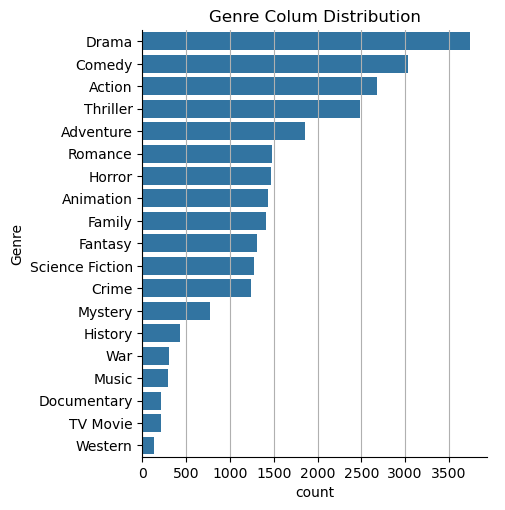

In [59]:
sb.catplot(y='Genre', data=df, kind='count', order = df['Genre'].value_counts().index)
plt.grid(axis='x')
plt.title('Genre Colum Distribution')
plt.show()

## Q2. **Which Genre has the higest vote**

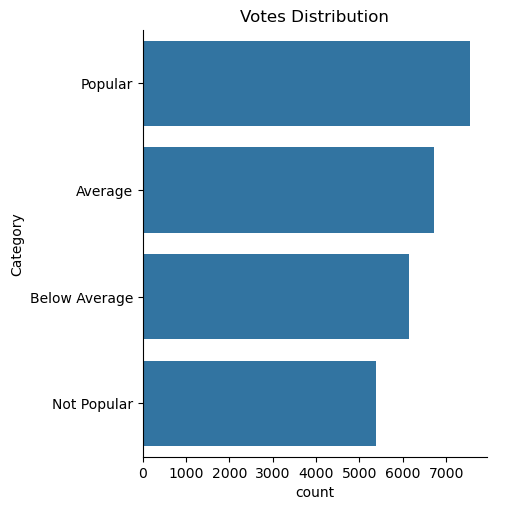

In [69]:
sb.catplot(y='Category', data=df, kind='count', order = df['Category'].value_counts().index)
plt.title('Votes Distribution')
plt.show()

## Q3. **Which movie has the higest populariry and wWat is its Genre**

In [78]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Category
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action,Popular
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure,Popular
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction,Popular


## Q4. **Which movie has the lowest populariry and wWat is its Genre**

In [81]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Category
25782,2021,The United States vs. Billie Holiday,13.354,152,6.7,Music,Average
25783,2021,The United States vs. Billie Holiday,13.354,152,6.7,Drama,Average
25784,2021,The United States vs. Billie Holiday,13.354,152,6.7,History,Average
25785,1984,Threads,13.354,186,7.8,War,Popular
25786,1984,Threads,13.354,186,7.8,Drama,Popular
25787,1984,Threads,13.354,186,7.8,Science Fiction,Popular


## Q5. **Which year has the most filmed movies**

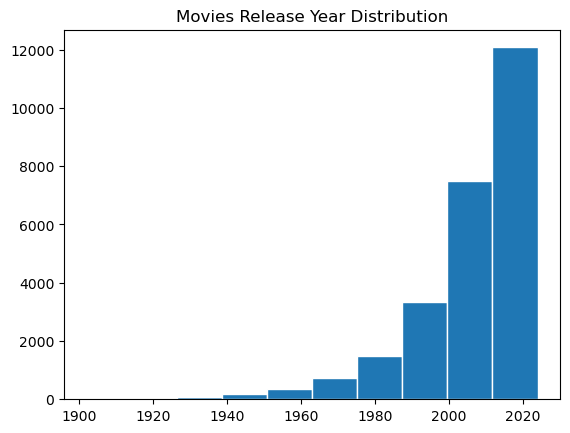

In [105]:
df['Release_Date'].hist(edgecolor='white')
plt.title('Movies Release Year Distribution')
plt.grid(False)
plt.show()

# Summary

*Q1. What is the most frequent genre of movies*
    
The most frequent Genre of Movies is **Drama** having frequency of **3744.**

*Q2. Which Genre has the higest vote*
    
The Genre with the Higest vote is Drama having **25.5%** of dataset with popular votes
    
*Q3. Which movie has the higest populariry and wWat is its Genre*
    
The movie with the highest vote is **"Spider-Man: No Way Home"** having the higest vote of **8940**.
    
*Q4. Which movie has the lowest populariry and wWat is its Genre*
    
The movies with the lowest vote are **"The United States vs. Billie Holiday" & "Threads"** having the lowest vote of **152**.
    
*Q5. Which year has the most filmed movies*
    
The year **2020** has the higest filmed movies in our dataset